In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv('/content/ecommerce_shipping_data.csv')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None


In [ ]:
print(df.describe())

                ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16

In [ ]:
print(df.isnull().sum())

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [ ]:
print(df['Reached.on.Time_Y.N'].value_counts())

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64


In [ ]:
on_time = df[df['Reached.on.Time_Y.N']==1]
late = df[df['Reached.on.Time_Y.N']==0]

In [ ]:
print(on_time.shape)
print(late.shape)

(6563, 12)
(4436, 12)


In [ ]:
on_time.sample= on_time.sample(n=4436)

In [ ]:
print(on_time.sample.shape)

(4436, 12)


In [ ]:
data=pd.concat([on_time.sample,late],axis=0)

In [ ]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
2539,2540,F,Ship,2,5,252,2,low,F,21,2070,1
3119,3120,F,Ship,4,2,155,5,low,F,48,1043,1
5702,5703,A,Ship,4,4,188,3,low,M,6,4174,1
5078,5079,A,Flight,4,3,181,3,medium,M,10,4541,1
1817,1818,F,Ship,4,1,144,4,low,F,63,1881,1


In [ ]:
data.drop(['ID'], axis=1, inplace=True)

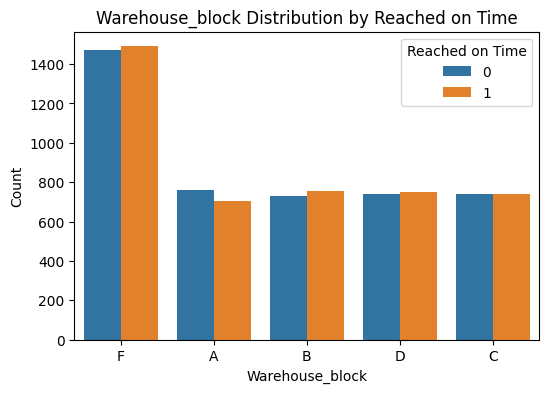

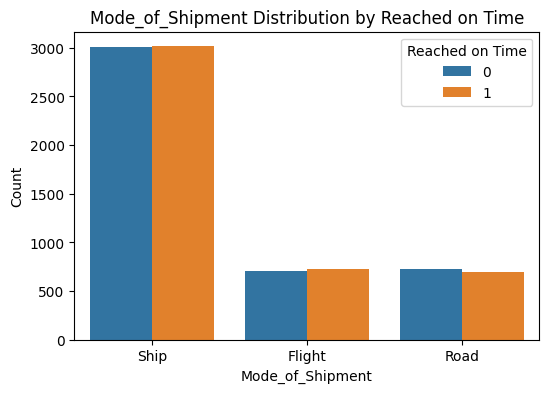

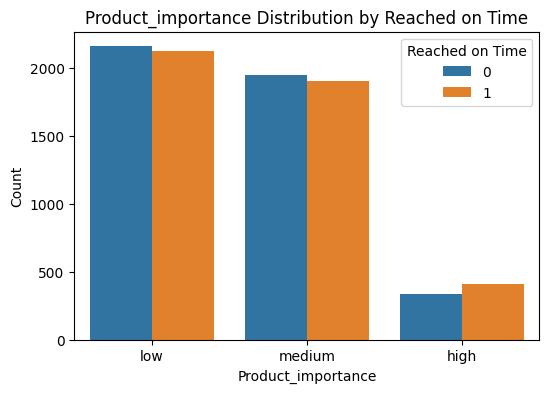

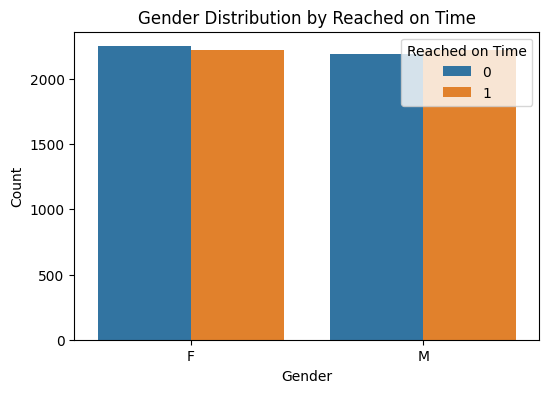

In [ ]:
categorical_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='Reached.on.Time_Y.N', data=data)
    plt.title(f'{feature} Distribution by Reached on Time')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Reached on Time', loc='best')
    plt.show()

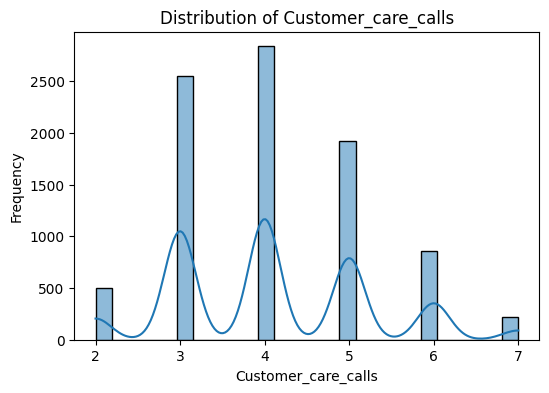

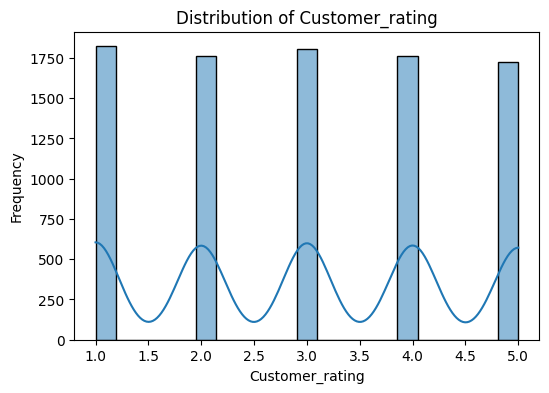

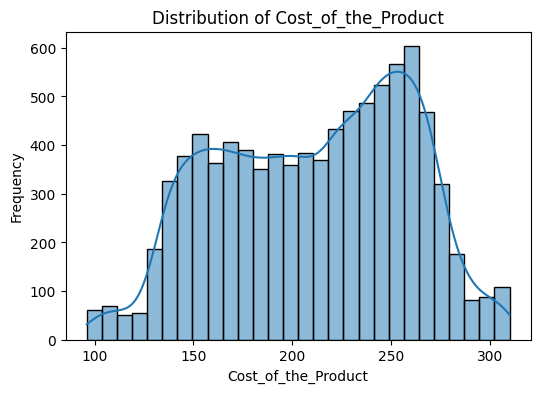

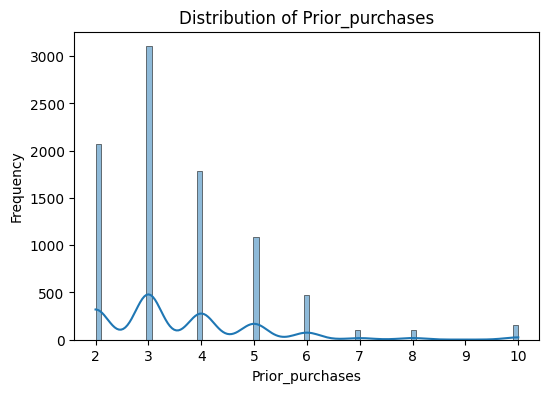

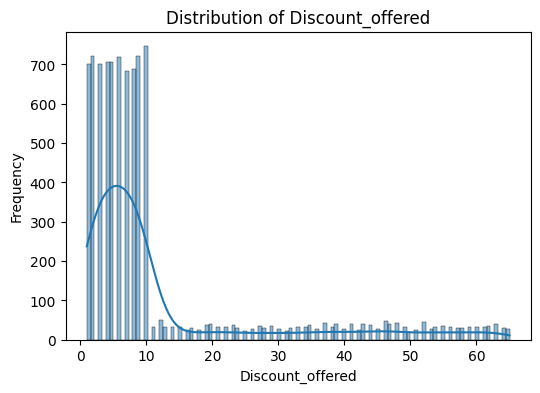

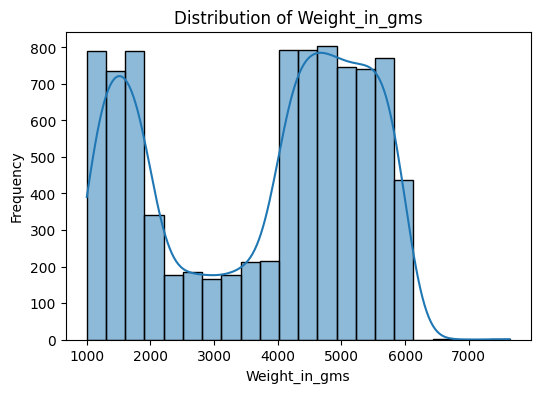

In [ ]:
numeric_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
                    'Discount_offered', 'Weight_in_gms']

for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

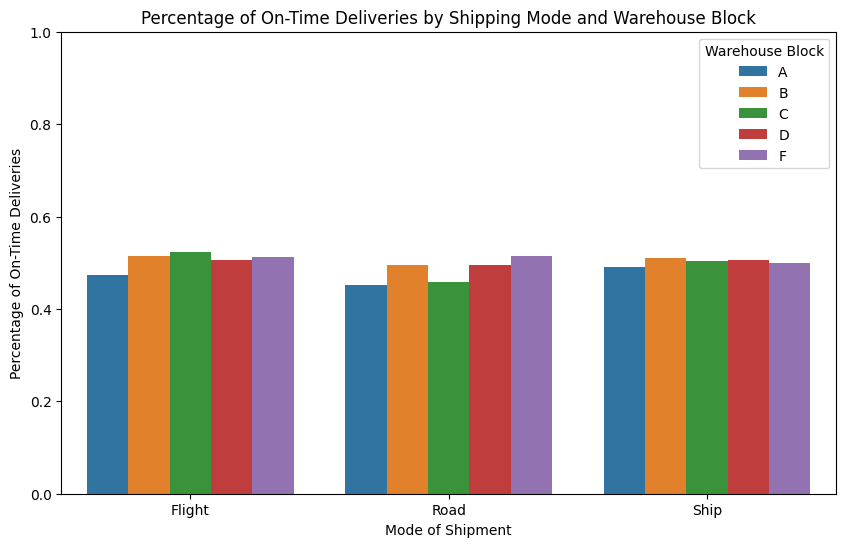

In [ ]:
on_time_delivery = data.groupby(['Mode_of_Shipment', 'Warehouse_block'])['Reached.on.Time_Y.N'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=on_time_delivery, x='Mode_of_Shipment', y='Reached.on.Time_Y.N', hue='Warehouse_block')
plt.title('Percentage of On-Time Deliveries by Shipping Mode and Warehouse Block')
plt.ylabel('Percentage of On-Time Deliveries')
plt.xlabel('Mode of Shipment')
plt.ylim(0, 1)
plt.legend(title='Warehouse Block')
plt.show()

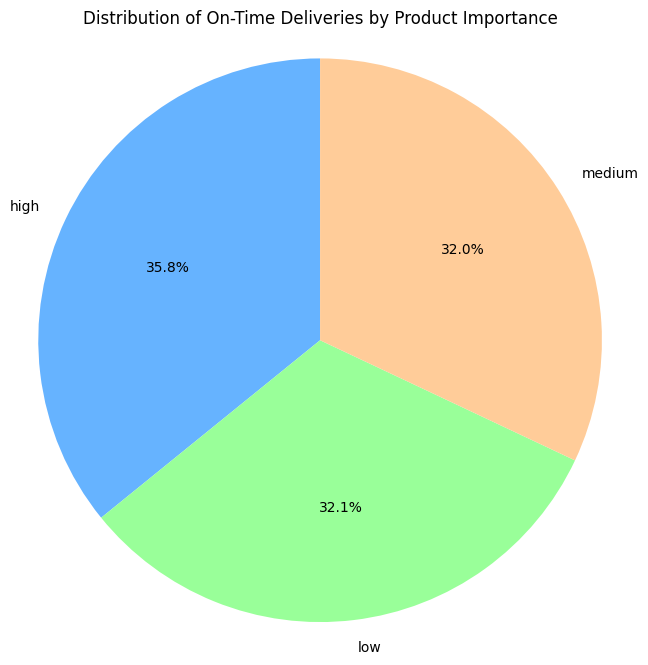

In [ ]:
delivery_time_by_importance = data.groupby('Product_importance')['Reached.on.Time_Y.N'].mean().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(delivery_time_by_importance['Reached.on.Time_Y.N'],
        labels=delivery_time_by_importance['Product_importance'],
        autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])

plt.title('Distribution of On-Time Deliveries by Product Importance')
plt.axis('equal')
plt.show()

In [ ]:
label_encoder = LabelEncoder()

data['Warehouse_block'] = label_encoder.fit_transform(data['Warehouse_block'])
data['Mode_of_Shipment'] = label_encoder.fit_transform(data['Mode_of_Shipment'])
data['Product_importance'] = label_encoder.fit_transform(data['Product_importance'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

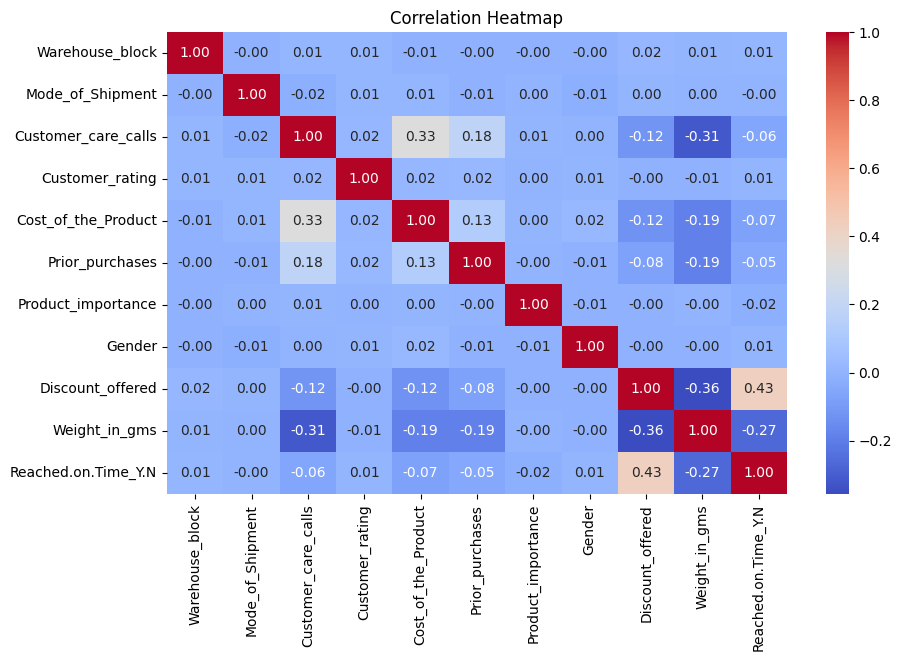

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = data.drop('Reached.on.Time_Y.N', axis=1)
y = data['Reached.on.Time_Y.N']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, 20]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)
rf_best = grid_rf.best_estimator_

rf_pred = rf_best.predict(X_test)
print("Random Forest Best Parameters:", grid_rf.best_params_)
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(f"Random Forest ROC-AUC: {roc_auc_score(y_test, rf_pred)}")

Random Forest Best Parameters: {'max_depth': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.65      0.98      0.78      1334
           1       0.96      0.47      0.64      1328

    accuracy                           0.73      2662
   macro avg       0.81      0.73      0.71      2662
weighted avg       0.81      0.73      0.71      2662

[[1311   23]
 [ 698  630]]
Random Forest ROC-AUC: 0.7285781055255504


In [ ]:
rf2 = RandomForestClassifier(random_state=42)
param_grid_rf2 = {
    'n_estimators': [250, 260],
    'max_depth': [10, 15],
    'min_samples_split': [3, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None]
}

grid_rf2 = GridSearchCV(rf2, param_grid_rf2, scoring='roc_auc', cv=5)
grid_rf2.fit(X_train, y_train)

rf2_best = grid_rf2.best_estimator_

rf2_pred = rf2_best.predict(X_test)
print("Random Forest Best Parameters:", grid_rf2.best_params_)
print(classification_report(y_test, rf2_pred))
print(confusion_matrix(y_test, rf2_pred))
print(f"Random Forest ROC-AUC: {roc_auc_score(y_test, rf2_pred)}")


Random Forest Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 260}
              precision    recall  f1-score   support

           0       0.65      0.98      0.78      1334
           1       0.95      0.48      0.64      1328

    accuracy                           0.73      2662
   macro avg       0.80      0.73      0.71      2662
weighted avg       0.80      0.73      0.71      2662

[[1302   32]
 [ 688  640]]
Random Forest ROC-AUC: 0.728969852423186


In [ ]:
rf3 = RandomForestClassifier(random_state=42)
param_grid_rf3 = {
    'n_estimators': [300, 350],
    'max_depth': [10, 15],
    'min_samples_split': [3, 5],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

grid_rf3 = GridSearchCV(rf3, param_grid_rf3, scoring='roc_auc', cv=5)
grid_rf3.fit(X_train, y_train)

rf3_best = grid_rf3.best_estimator_

rf3_pred = rf3_best.predict(X_test)
print("Random Forest Best Parameters:", grid_rf3.best_params_)
print(classification_report(y_test, rf3_pred))
print(confusion_matrix(y_test, rf3_pred))
print(f"Random Forest ROC-AUC: {roc_auc_score(y_test, rf3_pred)}")


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Random Forest Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.65      0.98      0.78      1334
           1       0.96      0.48      0.64      1328

    accuracy                           0.73      2662
   macro avg       0.81      0.73      0.71      2662
weighted avg       0.81      0.73      0.71      2662

[[1307   27]
 [ 693  635]]
Random Forest ROC-AUC: 0.7289613852712199


Decision Trees

In [ ]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
param_grid_dt = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='roc_auc')
grid_dt.fit(X_train, y_train)
dt_best = grid_dt.best_estimator_

dt_pred = dt_best.predict(X_test)
print("Decision Tree Best Parameters:", grid_dt.best_params_)
print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print(f"Decision Tree ROC-AUC: {roc_auc_score(y_test, dt_pred)}")

Decision Tree Best Parameters: {'max_depth': 5, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.65      0.99      0.78      1334
           1       0.97      0.47      0.63      1328

    accuracy                           0.73      2662
   macro avg       0.81      0.73      0.71      2662
weighted avg       0.81      0.73      0.71      2662

[[1316   18]
 [ 706  622]]
Decision Tree ROC-AUC: 0.7274401203012952


In [ ]:
dt2 = DecisionTreeClassifier(random_state=42)
param_grid_dt2 = {
    'max_depth': [2,3, 5],
    'min_samples_split': [1,3,10],
    'min_samples_leaf': [1, 2]
}

grid_dt2 = GridSearchCV(dt2, param_grid_dt2, scoring='roc_auc', cv=5)
grid_dt2.fit(X_train, y_train)

dt2_best = grid_dt2.best_estimator_

dt2_pred = dt2_best.predict(X_test)
print("Decision Tree Best Parameters:", grid_dt2.best_params_)
print(classification_report(y_test, dt2_pred))
print(confusion_matrix(y_test, dt2_pred))
print(f"Decision Tree ROC-AUC: {roc_auc_score(y_test, dt2_pred)}")

Decision Tree Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}
              precision    recall  f1-score   support

           0       0.65      0.98      0.78      1334
           1       0.95      0.46      0.62      1328

    accuracy                           0.72      2662
   macro avg       0.80      0.72      0.70      2662
weighted avg       0.80      0.72      0.70      2662

[[1305   29]
 [ 713  615]]
Decision Tree ROC-AUC: 0.7206816396018858


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

In [ ]:
dt3 = DecisionTreeClassifier(random_state=42)
param_grid_dt3 = {
    'max_depth': [12, 15],
    'min_samples_split': [3],
    'min_samples_leaf': [1, 2]
}

grid_dt3 = GridSearchCV(dt3, param_grid_dt3, scoring='roc_auc', cv=5)
grid_dt3.fit(X_train, y_train)

dt3_best = grid_dt3.best_estimator_

dt3_pred = dt3_best.predict(X_test)
print("Decision Tree Best Parameters:", grid_dt3.best_params_)
print(classification_report(y_test, dt3_pred))
print(confusion_matrix(y_test, dt3_pred))
print(f"Decision Tree ROC-AUC: {roc_auc_score(y_test, dt3_pred)}")


Decision Tree Best Parameters: {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 3}
              precision    recall  f1-score   support

           0       0.66      0.87      0.75      1334
           1       0.81      0.54      0.65      1328

    accuracy                           0.71      2662
   macro avg       0.73      0.71      0.70      2662
weighted avg       0.73      0.71      0.70      2662

[[1163  171]
 [ 608  720]]
Decision Tree ROC-AUC: 0.7069913838261592


Logistic Regression

In [ ]:
lr = LogisticRegression(random_state=42, class_weight='balanced')
param_grid_lr = {
    'C': [0.1, 1, 10]
}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='roc_auc')
grid_lr.fit(X_train, y_train)
lr_best = grid_lr.best_estimator_

lr_pred = lr_best.predict(X_test)
print("Logistic Regression Best Parameters:", grid_lr.best_params_)
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print(f"Logistic Regression ROC-AUC: {roc_auc_score(y_test, lr_pred)}")

Logistic Regression Best Parameters: {'C': 0.1}
              precision    recall  f1-score   support

           0       0.63      0.84      0.72      1334
           1       0.75      0.50      0.60      1328

    accuracy                           0.67      2662
   macro avg       0.69      0.67      0.66      2662
weighted avg       0.69      0.67      0.66      2662

[[1118  216]
 [ 664  664]]
Logistic Regression ROC-AUC: 0.6690404797601199


In [ ]:
lr2 = LogisticRegression(random_state=42)
param_grid_lr2 = {
    'C': [0.5, 1, 5],
    'solver': ['liblinear']
}

grid_lr2 = GridSearchCV(lr2, param_grid_lr2, scoring='roc_auc', cv=5)
grid_lr2.fit(X_train, y_train)
lr2_best = grid_lr2.best_estimator_

lr2_pred = lr2_best.predict(X_test)
print("Logistic Regression Best Parameters:", grid_lr2.best_params_)
print(classification_report(y_test, lr2_pred))
print(confusion_matrix(y_test, lr2_pred))
print(f"Logistic Regression ROC-AUC: {roc_auc_score(y_test, lr2_pred)}")

Logistic Regression Best Parameters: {'C': 0.5, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.63      0.83      0.72      1334
           1       0.75      0.50      0.60      1328

    accuracy                           0.67      2662
   macro avg       0.69      0.67      0.66      2662
weighted avg       0.69      0.67      0.66      2662

[[1113  221]
 [ 659  669]]
Logistic Regression ROC-AUC: 0.6690489469120862


In [ ]:
lr3 = LogisticRegression(random_state=42)
param_grid_lr3 = {
    'C': [0.01, 0.1],
    'solver': ['liblinear']
}

grid_lr3 = GridSearchCV(lr3, param_grid_lr3, scoring='roc_auc', cv=5)
grid_lr3.fit(X_train, y_train)

lr3_best = grid_lr3.best_estimator_

lr3_pred = lr3_best.predict(X_test)
print("Logistic Regression Best Parameters:", grid_lr3.best_params_)
print(classification_report(y_test, lr3_pred))
print(confusion_matrix(y_test, lr3_pred))
print(f"Logistic Regression ROC-AUC: {roc_auc_score(y_test, lr3_pred)}")

Logistic Regression Best Parameters: {'C': 0.01, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.63      0.86      0.72      1334
           1       0.77      0.48      0.60      1328

    accuracy                           0.67      2662
   macro avg       0.70      0.67      0.66      2662
weighted avg       0.70      0.67      0.66      2662

[[1146  188]
 [ 684  644]]
Logistic Regression ROC-AUC: 0.6720051119018804


SVM

In [ ]:
svm = SVC(probability=True, random_state=42, class_weight='balanced')
param_grid_svm = {
    'C': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='roc_auc')
grid_svm.fit(X_train, y_train)
svm_best = grid_svm.best_estimator_

svm_pred = svm_best.predict(X_test)
print("SVM Best Parameters:", grid_svm.best_params_)
print(classification_report(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))
print(f"SVM ROC-AUC: {roc_auc_score(y_test, svm_pred)}")

SVM Best Parameters: {'C': 0.01, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.62      0.99      0.76      1334
           1       0.97      0.40      0.57      1328

    accuracy                           0.70      2662
   macro avg       0.80      0.69      0.67      2662
weighted avg       0.80      0.70      0.67      2662

[[1318   16]
 [ 795  533]]
SVM ROC-AUC: 0.6946807093441232


In [ ]:
svm2 = SVC(random_state=42, probability=True)
param_grid_svm4 = {
    'C': [1,10],
    'kernel': ['rbf']
}

grid_svm2 = GridSearchCV(svm2, param_grid_svm4, scoring='roc_auc', cv=5)
grid_svm2.fit(X_train, y_train)

svm2_best = grid_svm2.best_estimator_

svm2_pred = svm2_best.predict(X_test)
print("SVM Best Parameters:", grid_svm2.best_params_)
print(classification_report(y_test, svm2_pred))
print(confusion_matrix(y_test, svm2_pred))
print(f"SVM ROC-AUC: {roc_auc_score(y_test, svm2_pred)}")

SVM Best Parameters: {'C': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.64      0.98      0.77      1334
           1       0.95      0.44      0.60      1328

    accuracy                           0.71      2662
   macro avg       0.79      0.71      0.69      2662
weighted avg       0.79      0.71      0.69      2662

[[1303   31]
 [ 745  583]]
SVM ROC-AUC: 0.7078838216433951


In [ ]:
svm3 = SVC(random_state=42, probability=True)
param_grid_svm3 = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

grid_svm3 = GridSearchCV(svm3, param_grid_svm3, scoring='roc_auc', cv=5)
grid_svm3.fit(X_train, y_train)
svm3_best = grid_svm3.best_estimator_

svm3_pred = svm3_best.predict(X_test)
print("SVM Best Parameters:", grid_svm3.best_params_)
print(classification_report(y_test, svm3_pred))
print(confusion_matrix(y_test, svm3_pred))
print(f"SVM ROC-AUC: {roc_auc_score(y_test, svm3_pred)}")

SVM Best Parameters: {'C': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.63      0.99      0.77      1334
           1       0.97      0.42      0.59      1328

    accuracy                           0.70      2662
   macro avg       0.80      0.70      0.68      2662
weighted avg       0.80      0.70      0.68      2662

[[1314   20]
 [ 767  561]]
SVM ROC-AUC: 0.7037236276440093


XGBoost

In [ ]:
ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb = XGBClassifier(random_state=42, scale_pos_weight=ratio)
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10]
}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='roc_auc')
grid_xgb.fit(X_train, y_train)
xgb_best = grid_xgb.best_estimator_

xgb_pred = xgb_best.predict(X_test)
print("XGBoost Best Parameters:", grid_xgb.best_params_)
print(classification_report(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))
print(f"XGBoost ROC-AUC: {roc_auc_score(y_test, xgb_pred)}")

XGBoost Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.65      0.98      0.78      1334
           1       0.97      0.47      0.63      1328

    accuracy                           0.73      2662
   macro avg       0.81      0.72      0.71      2662
weighted avg       0.81      0.73      0.71      2662

[[1313   21]
 [ 710  618]]
XGBoost ROC-AUC: 0.7248096584238001


In [ ]:
xgb2 = XGBClassifier(random_state=42)
param_grid_xgb2 = {
    'n_estimators': [200, 250],
    'max_depth': [5, 7],
    'learning_rate': [0.1, 0.015],
    'subsample': [0.8],
    'colsample_bytree': [1.0]
}

grid_xgb2 = GridSearchCV(xgb2, param_grid_xgb2, scoring='roc_auc', cv=5)
grid_xgb2.fit(X_train, y_train)

xgb2_best = grid_xgb2.best_estimator_

xgb2_pred = xgb2_best.predict(X_test)
print("XGBoost Best Parameters:", grid_xgb2.best_params_)
print(classification_report(y_test, xgb2_pred))
print(confusion_matrix(y_test, xgb2_pred))
print(f"XGBoost ROC-AUC: {roc_auc_score(y_test, xgb2_pred)}")


XGBoost Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.65      0.98      0.78      1334
           1       0.96      0.48      0.64      1328

    accuracy                           0.73      2662
   macro avg       0.81      0.73      0.71      2662
weighted avg       0.81      0.73      0.71      2662

[[1309   25]
 [ 694  634]]
XGBoost ROC-AUC: 0.7293345044345297


In [ ]:
xgb3 = XGBClassifier(random_state=42)
param_grid_xgb3 = {
    'n_estimators': [250, 300],
    'max_depth': [5, 7],
    'learning_rate': [0.01, 0.015, 0.05],
    'subsample': [0.8],
    'colsample_bytree': [0.8, 1.0]
}

grid_xgb3 = GridSearchCV(xgb3, param_grid_xgb3, scoring='roc_auc', cv=7)
grid_xgb3.fit(X_train, y_train)
xgb3_best = grid_xgb3.best_estimator_

xgb3_pred = xgb3_best.predict(X_test)
print("XGBoost Best Parameters:", grid_xgb3.best_params_)
print(classification_report(y_test, xgb3_pred))
print(confusion_matrix(y_test, xgb3_pred))
print(f"XGBoost ROC-AUC: {roc_auc_score(y_test, xgb3_pred)}")

XGBoost Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.65      0.98      0.78      1334
           1       0.96      0.48      0.64      1328

    accuracy                           0.73      2662
   macro avg       0.81      0.73      0.71      2662
weighted avg       0.81      0.73      0.71      2662

[[1311   23]
 [ 697  631]]
XGBoost ROC-AUC: 0.7289546115496468


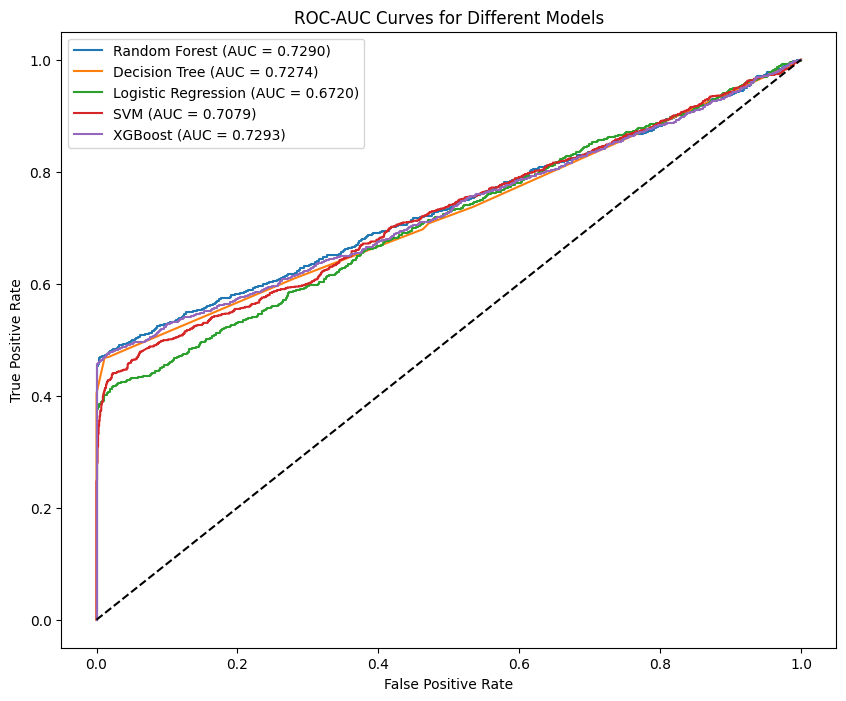

In [ ]:
models = {
    'Random Forest': rf2_best,
    'Decision Tree': dt_best,
    'Logistic Regression': lr3_best,
    'SVM': svm2_best,
    'XGBoost': xgb2_best
}

plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, model.predict(X_test)):.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves for Different Models')
plt.legend(loc='best')
plt.show()

In [ ]:
correlation = data['Reached.on.Time_Y.N'].corr(data['Customer_rating'])
print(f'Correlation between Timely Delivery and Customer Rating: {correlation}')

Correlation between Timely Delivery and Customer Rating: 0.006943649590920958
